# Практическая работа №5
### Выполнил студент группы БВТ2102 Маширин Федор Сергеевич
#### Вариант 4
Необходимо в зависимости от варианта сгенерировать датасет и сохранить его в формате csv.

Построить модель, которая будет содержать в себе автокодировщик и регрессионную модель. Схематично это должно выглядеть следующим образом:<br>
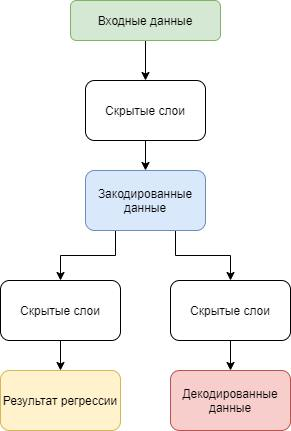

Обучить модель и разбить обученную модель на 3:
1. Модель кодирования данных (Входные данные -> Закодированные данные)
2. Модель декодирования данных (Закодированные данные -> Декодированные данные)
3. Регрессионную модель (Входные данные -> Результат регрессии)


В качестве результата представить исходный код, сгенерированные данные в формате csv, кодированные и декодированные данные в формате csv, результат регрессии в формате csv (что должно быть и что выдает модель), и сами 3 модели в формате h5.
<br>
Вариант выбирается по списку, цель регрессии выбирается по остатку деления номера зачетки (последние 2 цифры)  на 7 плюс 1. Предсказать надо одно значение, на основании шести остальных.
В названии pr необходимо будет указать номер варианта и номер цели.
<br>
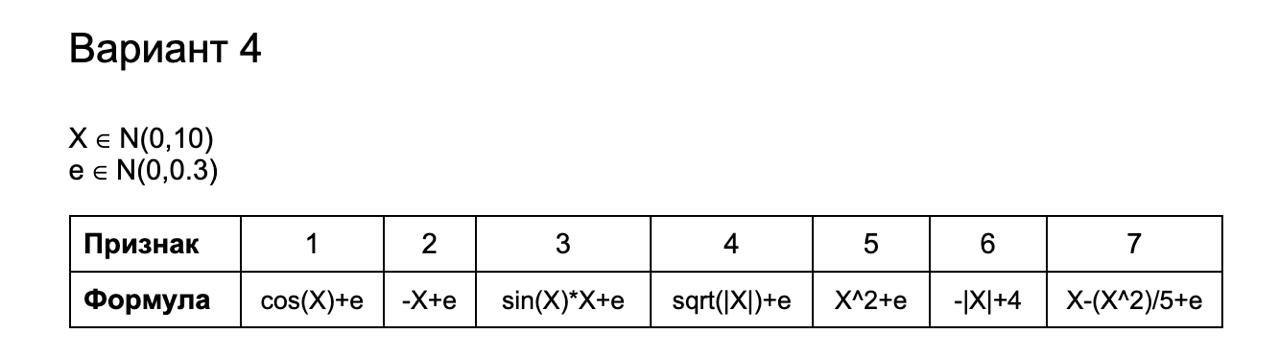

In [1]:
98 % 7 + 1

1

In [2]:
import numpy as np
import pandas as pd
from keras.models import Model, Sequential
from keras.layers import Input, Dense
from keras.models import load_model
from sklearn.model_selection import train_test_split

In [12]:
np.random.seed(12345)
X = np.random.normal(0, 10, 1001)
e = np.random.normal(0, 0.3, 1001)

f1 = np.cos(X) + e
f2 = -X + e
f3 = np.sin(X) * X + e
f4 = np.sqrt(np.abs(X)) + e
f5 = X**2 + e
f6 = -np.abs(X) + 4
f7 = X-X*X/5 + e


data = pd.DataFrame({
    'feature_1': f1,
    'feature_2': f2,
    'feature_3': f3,
    'feature_4': f4,
    'feature_5': f5,
    'feature_6': f6,
    'feature_7': f7
})

In [13]:
data

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7
0,-0.179193,2.326360,2.098533,1.710044,4.469806,1.952923,-2.605898
1,-0.166534,-5.032936,-5.018728,1.944975,22.695169,-0.789433,-0.041804
2,-0.085496,4.645340,-5.151640,1.730073,26.432611,-1.194387,-11.139766
3,0.706295,5.515684,-3.730532,2.315774,30.841998,-1.557303,-11.775646
4,0.790992,-19.557579,14.314379,4.533939,386.529552,-15.657806,-57.527833
...,...,...,...,...,...,...,...
996,0.104148,1.320237,1.298272,1.107506,1.867642,2.607025,-1.853789
997,-0.349419,10.682160,-10.466191,2.488671,133.625672,-7.599257,-39.424908
998,1.571149,-5.614127,-0.002599,3.063421,38.887261,-2.189648,-0.897179
999,0.214169,-13.912553,12.489999,3.532955,188.583854,-9.738905,-24.186244


In [14]:
data.to_csv('dataset.csv', index=False)

In [15]:
X = data.drop(columns=['feature_1'])
y = data['feature_1']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()



In [18]:
# Построение модели автокодировщика
input_layer = Input(shape=(6,))

encoded = Dense(32, activation='relu', name = 'encoder1')(input_layer)
encoded_output = Dense(16, activation='relu', name = 'encoder2')(encoded)

decoded = Dense(16, activation='relu', name = 'decoder1')(encoded_output)
decoded_output = Dense(6, name = 'decoder2')(decoded)

regression = Dense(16, activation='relu', name = 'regression1')(encoded_output)
regression = Dense(8, name = 'regression2')(regression)
regression = Dense(4, name = 'regression3')(regression)
regression_output = Dense(1, name = 'regression4')(regression)


autoencoder = Model(inputs=input_layer, outputs=[decoded_output, regression_output])
autoencoder.compile(optimizer='adam', loss=['mse', 'mse'])

history = autoencoder.fit(X_train_scaled, [X_train_scaled, y_train_scaled], epochs=125, batch_size=60, validation_data = (X_test_scaled, [X_test_scaled, y_test_scaled]), verbose=1)


Epoch 1/125
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - decoder2_loss: 1.0868 - loss: 2.0771 - regression4_loss: 0.9888 - val_decoder2_loss: 0.9187 - val_loss: 1.8955 - val_regression4_loss: 0.8739
Epoch 2/125
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - decoder2_loss: 0.9225 - loss: 1.9014 - regression4_loss: 0.9794 - val_decoder2_loss: 0.8043 - val_loss: 1.7667 - val_regression4_loss: 0.8727
Epoch 3/125
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - decoder2_loss: 0.7778 - loss: 1.7456 - regression4_loss: 0.9702 - val_decoder2_loss: 0.6866 - val_loss: 1.6141 - val_regression4_loss: 0.8576
Epoch 4/125
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - decoder2_loss: 0.7720 - loss: 1.6904 - regression4_loss: 0.9172 - val_decoder2_loss: 0.5715 - val_loss: 1.4724 - val_regression4_loss: 0.8485
Epoch 5/125
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - decoder2_loss: 0.6354 - loss: 1.5069 - regression4_loss: 0.8714 - val_decoder2_loss: 0.4768 - val_loss: 1.3505 - val_regression4_loss: 0.8363
Epoch 6/125
14/14 ━━━━━━━

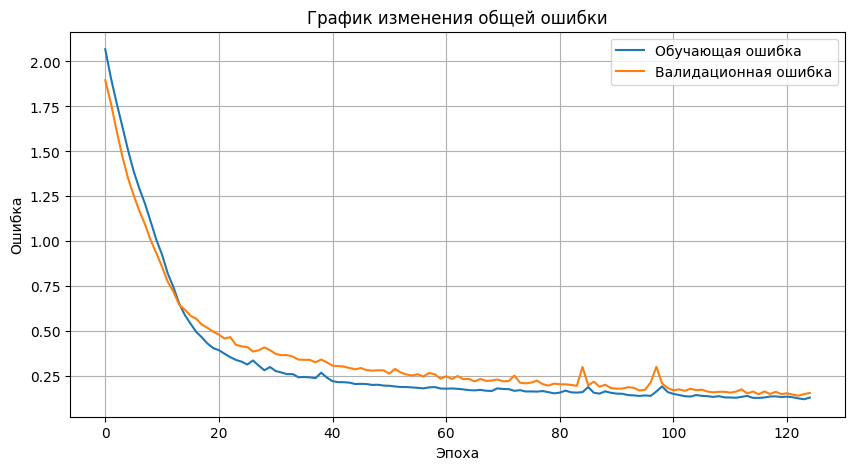

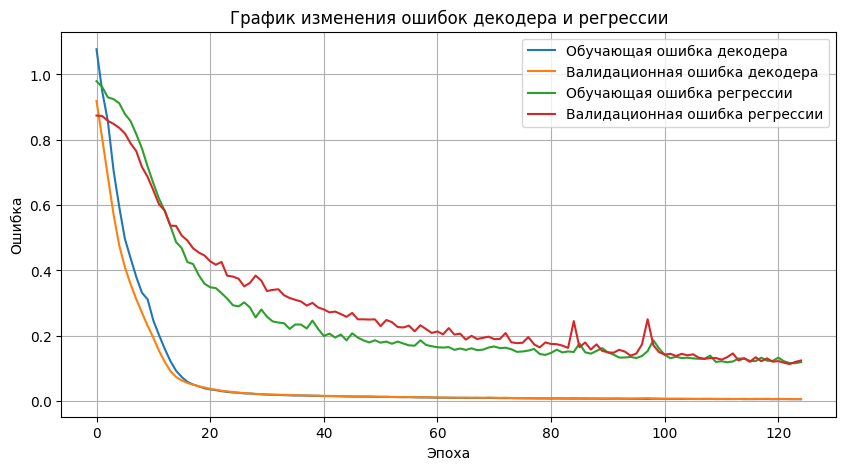

In [19]:
import matplotlib.pyplot as plt

# Построение графика ошибок
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Обучающая ошибка')
plt.plot(history.history['val_loss'], label='Валидационная ошибка')
plt.title('График изменения общей ошибки')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка')
plt.legend()
plt.grid(True)
plt.show()

# Графики отдельных ошибок декодера и регрессии
plt.figure(figsize=(10, 5))
plt.plot(history.history['decoder2_loss'], label='Обучающая ошибка декодера')
plt.plot(history.history['val_decoder2_loss'], label='Валидационная ошибка декодера')
plt.plot(history.history['regression4_loss'], label='Обучающая ошибка регрессии')
plt.plot(history.history['val_regression4_loss'], label='Валидационная ошибка регрессии')
plt.title('График изменения ошибок декодера и регрессии')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка')
plt.legend()
plt.grid(True)
plt.show()


In [20]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder1 (Dense)    │ (None, 32)        │        224 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder2 (Dense)    │ (None, 16)        │        528 │ encoder1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ regression1 (Dense) │ (None, 16)        │        272 │ encoder2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ regression2 (Dense) │ (None, 8)         │        136 │ regression1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder1 (Dense)    │ (None, 16)        │        272 │ encoder2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ regression3 (Dense) │ (None, 4)         │         36 │ regression2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder2 (Dense)    │ (None, 6)         │        102 │ decoder1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ regression4 (Dense) │ (None, 1)         │          5 │ regression3[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 4,727 (18.47 KB)

 Trainable params: 1,575 (6.15 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,152 (12.32 KB)

In [21]:
autoencoder.layers

[<InputLayer name=input_layer, built=True>,
 <Dense name=encoder1, built=True>,
 <Dense name=encoder2, built=True>,
 <Dense name=regression1, built=True>,
 <Dense name=regression2, built=True>,
 <Dense name=decoder1, built=True>,
 <Dense name=regression3, built=True>,
 <Dense name=decoder2, built=True>,
 <Dense name=regression4, built=True>]

In [22]:
# Кодировщик
encoder_input_layer = Input(shape=(6,))
encoder_layer1 = autoencoder.layers[1](encoder_input_layer)
encoded_output = autoencoder.layers[2](encoder_layer1)
encoder = Model(inputs=encoder_input_layer, outputs=encoded_output)
# Декодер
decoder_input_layer = Input(shape=(16,))
decoder_layer1 = autoencoder.layers[5](decoder_input_layer)
decoder_output = autoencoder.layers[7](decoder_layer1)
decoder = Model(inputs=decoder_input_layer, outputs=decoder_output)

regression_input_layer = Input(shape=(16,))
regression_layer1 = autoencoder.layers[3](regression_input_layer)
regression_layer2 = autoencoder.layers[4](regression_layer1)
regression_output = autoencoder.layers[6](regression_layer2)
regression = Model(inputs=regression_input_layer, outputs=regression_output)

# Сохранение моделей
encoder.save('encoder_variant3.h5')
decoder.save('decoder_variant3.h5')
regression.save('regression_variant3.h5')


In [23]:
# Кодирование и декодирование данных
encoded_data = encoder.predict(X_test_scaled)
decoded_data = decoder.predict(encoded_data)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [24]:
pd.DataFrame(encoded_data).to_csv('encoded_data.csv', index=False)

In [25]:
pd.DataFrame(decoded_data, columns=X_train.columns).to_csv('decoded_data.csv', index=False)

In [26]:
regression_result = autoencoder.predict(X_test_scaled)[1]
regression_df = pd.DataFrame({
    'Actual': y_test_scaled,
    'Predicted': regression_result.ravel()
})

# Сохранение результата регрессии
regression_df.to_csv('regression_result.csv', index=False)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
